# 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [4]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#패키지 설치
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=48dad725990ffa8d95dbf508201f4251f50e215cfaef40693bcc4fe215fca8b5
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [6]:
#여러 사람의 얼굴이 들어간 이미지 준비

import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [7]:
image_path = '/content/drive/MyDrive/gg.jpg'

In [8]:
#HOG(Histogram of Oriented Gradient) 모델 사용
#얼굴 감지

image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [9]:
for (top,right,bottom,left) in face_locations:
    
    cv2.rectangle(image,(left,top),(right,bottom),(0,255,0),3)

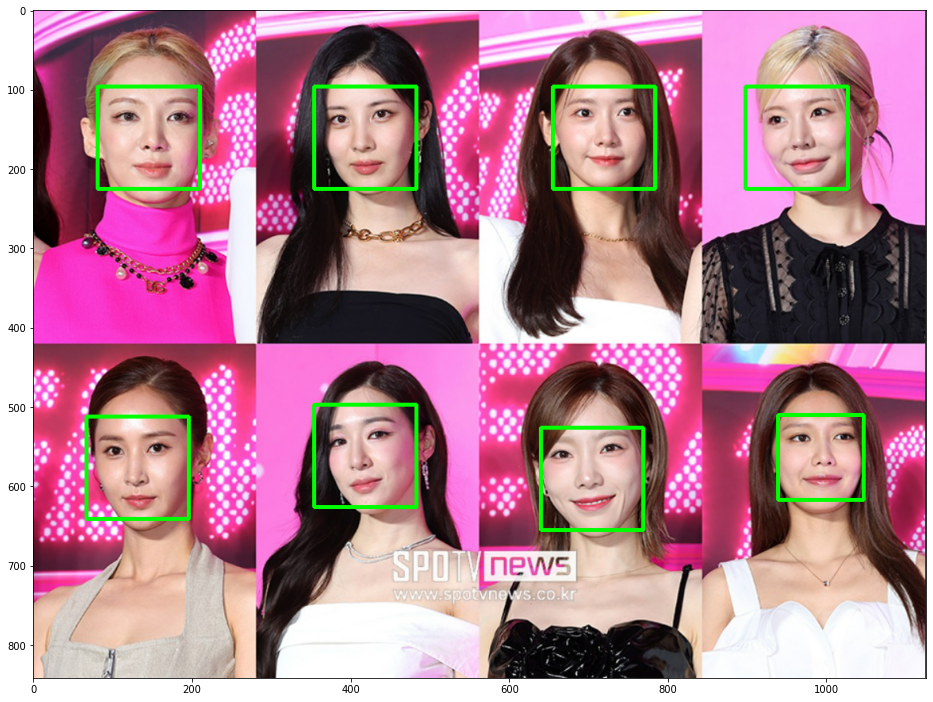

In [10]:
#이미지 출력
plt.rcParams['figure.figsize'] = (16,16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [13]:
#이미지 파일을 리스트에 저장

plt.rcParams['figure.figsize'] = (1,1)

n = 4 #이미지 개수

known_person_list = []

for i in range(1,n+1):
    
    known_person_list.append(fr.load_image_file(f'/content/drive/MyDrive/people{i}.jpg'))

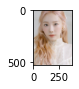

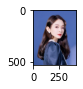

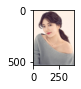

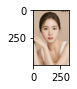

In [16]:
#저장된 사람 이미지 출력

for person in known_person_list:
    
    plt.imshow(person)
    plt.show()

In [39]:
#얼굴을 인식하여 감지된 부분을 잘라내 리스트에 저장

known_face_list = []

for person in known_person_list:
    
    #얼굴 좌표를 알아내 잘라낸다
    top, right, bottom, left = fr.face_locations(person)[0]
    face_image = person[top:bottom, left:right]

    #known_face_list에 잘라낸 face_image를 저장함
    known_face_list.append(face_image)

print(len(known_face_list))

4


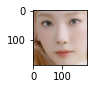

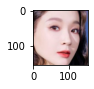

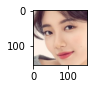

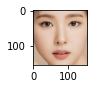

In [40]:
#저장된 얼굴 이미지 출력

for face in known_face_list:

    plt.imshow(face)
    plt.show()

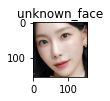

In [41]:
#알수없는 사람 이미지 얼굴 인식하기

unknown_person = fr.load_image_file('/content/drive/MyDrive/unknown.jpg')

#얼굴 좌표를 인식해 잘라냄
top,right,bottom,left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

#이미지 표시
plt.title('unknown_face')
plt.imshow(unknown_face)
plt.show()

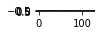

In [42]:
#face_encoding()을 이용해, unknown 얼굴 이미지를 인코딩

encoding_unknown_face = fr.face_encodings(unknown_face)

#화면 표시
plt.imshow(encoding_unknown_face)
plt.show()

https://velog.io/@dldndyd01/OpenCV-faceencodings-%EB%B9%88-%EB%A6%AC%EC%8A%A4%ED%8A%B8-%EC%97%90%EB%9F%AC-%ED%95%B4%EA%B2%B0%EB%B0%A9%EB%B2%95

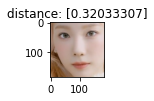

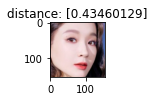

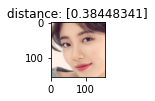

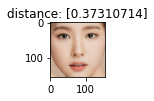

In [44]:
#이미 알고있는 얼굴 영역을 인코딩하여, unknown과 distance 비교

#일반적으로 distance가 0.6이상이면 타인으로 보고, 0.5미만이면 비슷한 사람으로 본다

for face in known_face_list:
    
    #등록된 얼굴을 128차원 벡터로 인코딩
    encoding_known_face = fr.face_encodings(face,known_face_locations=[(0,face.shape[1],face.shape[0],0)])

    #등록된 얼굴과 unknown의 distance비교
    distance = fr.face_distance(encoding_known_face,encoding_unknown_face[0])

    #distance 수치를 각 얼굴 이미지에 출력
    plt.title("distance: " + str(distance))
    plt.imshow(face)
    plt.show()